In [126]:
import pandas as pd
import numpy as np
import os

from visual_behavior_glm.glm import GLM
from visual_behavior_glm import GLM_visualization_tools as gvt

import sys
sys.path.append(os.path.split(os.getcwd())[0])
from utilities import helper_functions
import matplotlib.pyplot as plt

In [3]:
%matplotlib notebook

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
data_path = os.path.join('~/code/claustrum_imaging_manuscript/data')
session_list = pd.read_csv(os.path.join(os.path.join(data_path,'session_list.csv')))
active_sessions = session_list.query('session_type == "active"')
active_sessions

,mouse_id,sex,genotype,AP_coord,ML_coord,DV_coord,session_type,recording_date,processing_date
18,M332849,M,Gnb4-IRES2-CreERT2/wt;Camk2a-tTA/wt;Ai93(TITL-...,1.5,3.125,2.5,active,2018-06-14 12:44:33.658000,2018-07-26 12:11:01.983524799-07:00
19,M348126,F,Gnb4-IRES2-CreERT2/wt;Camk2a-tTA/wt;Ai94(TITL-...,1.5,2.625,2.5,active,2018-06-13 13:47:38.463000,2018-07-26 18:15:45.828682184-07:00
20,M351181,F,Gnb4-IRES2-CreERT2/wt;Camk2a-tTA/wt;Ai94(TITL-...,1.5,2.625,2.5,active,2018-03-14 14:32:15.328000,2018-07-26 18:59:36.293976068-07:00
21,M397408,F,Gnb4-IRES2-CreERT2/wt;Camk2a-tTA/wt;Ai93(TITL-...,1.5,2.625,2.5,active,2018-11-01 11:40:14.487000,2019-01-22 01:32:10.700291872-08:00


In [7]:
session_dict = {}
for idx,row in active_sessions.reset_index().iterrows():
    session_dict[row['mouse_id']] = helper_functions.load_session(
        row['mouse_id'], 
        session_type='active', 
        data_path = '/home/dougo/code/claustrum_imaging_manuscript/data'
    )
    print('on session {} of {}   '.format(idx+1,len(active_sessions)),end='\r')

In [8]:
dir(session_dict['M332849'])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'cell_folder',
 'cell_images',
 'data_path',
 'event_dict',
 'filtered_cell_count',
 'filtered_cell_ids',
 'filtered_traces',
 'licks',
 'metrics',
 'mouse_folder',
 'mouse_id',
 'rewards',
 'running',
 'session_type',
 'session_type_folder',
 'sync_data',
 'traces',
 'trials',
 'visual_stimuli']

In [9]:
session_dict['M332849'].event_dict.keys()

dict_keys(['hit_events', 'fa_events', 'miss_events', 'cr_events'])

In [14]:
session_dict['M332849'].sync_data['fluorescence_camera']

[3.34448,
 3.39449,
 3.4445,
 3.49451,
 3.54453,
 3.59454,
 3.64455,
 3.69456,
 3.74457,
 3.79458,
 3.84459,
 3.89461,
 3.94462,
 3.99463,
 4.04464,
 4.09465,
 4.14466,
 4.19468,
 4.24469,
 4.2947,
 4.34471,
 4.39472,
 4.44473,
 4.49474,
 4.54476,
 4.59477,
 4.64478,
 4.69479,
 4.7448,
 4.79481,
 4.84482,
 4.89484,
 4.94485,
 4.99486,
 5.04487,
 5.09488,
 5.14489,
 5.1949,
 5.24492,
 5.29493,
 5.34494,
 5.39495,
 5.44496,
 5.49497,
 5.54498,
 5.595,
 5.64501,
 5.69502,
 5.74503,
 5.79504,
 5.84505,
 5.89507,
 5.94508,
 5.99509,
 6.0451,
 6.09511,
 6.14512,
 6.19513,
 6.24515,
 6.29516,
 6.34517,
 6.39518,
 6.44519,
 6.4952,
 6.54521,
 6.59523,
 6.64524,
 6.69525,
 6.74526,
 6.79527,
 6.84528,
 6.89529,
 6.94531,
 6.99532,
 7.04533,
 7.09534,
 7.14535,
 7.19536,
 7.24537,
 7.29539,
 7.3454,
 7.39541,
 7.44542,
 7.49543,
 7.54544,
 7.59545,
 7.64547,
 7.69548,
 7.74549,
 7.7955,
 7.84551,
 7.89552,
 7.94554,
 7.99555,
 8.04556,
 8.09557,
 8.14558,
 8.19559,
 8.2456,
 8.29562,
 8.34563,
 

In [16]:
session_dict['M332849'].running

,time,frame,speed,dx,v_sig,v_in
0,0.000000,0,0.394860,32.655569,0.4512,4.973
1,0.050018,1,0.307275,0.000000,0.4512,4.973
2,0.100056,2,0.109845,-0.169617,0.4485,4.970
3,0.150099,3,-0.052928,0.205620,0.4514,4.973
4,0.200103,4,0.111586,0.114447,0.4531,4.973
...,...,...,...,...,...,...
94193,3599.847996,94193,0.226126,0.124227,3.3360,4.973
94194,3599.881357,94194,0.226079,0.078538,3.3360,4.970
94195,3599.914731,94195,0.226085,-0.101258,3.3340,4.970
94196,3599.948089,94196,-0.032910,-0.288235,3.3320,4.973


In [104]:
from importlib import reload
reload(helper_functions)

session = helper_functions.AllenSDKExperiment(session_dict['M351181'])

In [105]:
session.running_speed['time_to_nearest_ophys'].max()

0.039120000000139044

In [101]:
session.stimulus_presentations['time_to_nearest_ophys'].max()

0.024989999999888823

In [3]:
session.dff_traces

NameError: name 'session' is not defined

In [69]:
len(session_dict['M332849'].traces)

37763

In [54]:
session.trials['auto_rewarded'] = session.trials['auto_rewarded'].astype(bool)

In [55]:
session.trials['auto_rewarded'] = session.trials['auto_rewarded'].fillna(0).astype(bool)

In [56]:
session.trials['auto_rewarded'].value_counts()

False    862
True       5
Name: auto_rewarded, dtype: int64

In [57]:
session.running_speed

,timestamps,frame,speed,dx,v_sig,v_in
0,19.41062,0,17.190563,88.512687,1.224,4.977
1,19.47743,1,18.824949,11.940291,1.388,4.973
2,19.52711,2,16.850011,10.640557,1.535,4.973
3,19.57715,3,11.563350,6.897489,1.630,4.973
4,19.62722,4,12.357241,5.150496,1.701,4.973
...,...,...,...,...,...,...
94187,3619.23565,94187,0.315813,-0.572669,2.555,4.973
94188,3619.28569,94188,0.165195,-1.421431,2.535,4.973
94189,3619.33573,94189,0.018188,1.270273,2.553,4.973
94190,3619.36937,94190,1.422015,0.980233,2.564,4.973


In [58]:
len(session_dict['M348126'].sync_data['behavior_vsync'])

94186

In [59]:
session.stimulus_presentations

,frame,end_frame,start_time,duration,image_category,image_name,orientation,contrast,nearest_lick,change,nearest_F_frame,omitted,image_index,is_change
0,1,6,19.47743,0.281732,im066,im066,NaN,NaN,10.25817,True,356.0,False,0,True
1,20,26,20.19429,0.297977,im066,im066,NaN,NaN,9.54131,False,370.0,False,0,False
2,40,46,20.96180,0.297755,im066,im066,NaN,NaN,8.77380,False,385.0,False,0,False
3,60,65,21.72907,0.247806,im066,im066,NaN,NaN,8.00653,False,401.0,False,0,False
4,80,86,22.47990,0.297532,im066,im066,NaN,NaN,7.25570,False,416.0,False,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4705,94106,94111,3616.13363,0.247270,im085,im085,NaN,NaN,83.45327,False,36330.0,False,5,False
4706,94126,94132,3616.88376,0.297277,im085,im085,NaN,NaN,84.20340,False,36345.0,False,5,False
4707,94146,94152,3617.65120,0.297666,im085,im085,NaN,NaN,84.97084,False,36361.0,False,5,False
4708,94166,94172,3618.41844,0.297526,im085,im085,NaN,NaN,85.73808,False,36376.0,False,5,False


In [60]:
session_dict['M348126'].sync_data['behavior_vsync'][219]

33.45641

In [61]:
session.rewards

,frame,timestamps
0,159,25.49890
1,399,34.69004
2,1199,65.33231
3,1699,84.44980
4,1919,92.83882
...,...,...
102,85839,3300.35417
103,85988,3306.10867
104,86401,3321.87197
105,87075,3347.57692


In [81]:
session.dff_traces

,cell_roi_id,dff
cell_specimen_id,,
M351181_C000,M351181_C000,"[-0.19658653706995927, -0.1764199998859619, -0..."
M351181_C001,M351181_C001,"[0.9807013928286321, 1.1560325460079142, 1.144..."
M351181_C002,M351181_C002,"[3.7555179863613266, 3.3824031932948384, 3.569..."
M351181_C003,M351181_C003,"[0.11237204553535, -0.2435624418079708, -0.004..."
M351181_C004,M351181_C004,"[1.2507997841433869, 0.9520485051372848, 0.170..."
...,...,...
M351181_C149,M351181_C149,"[1.2551724628837329, 1.5081228717302508, 1.696..."
M351181_C151,M351181_C151,"[-2.403970240663461, -0.644923746516246, 0.015..."
M351181_C153,M351181_C153,"[1.0407457987961606, 1.713874134921499, 1.3842..."


<IPython.core.display.Javascript object>


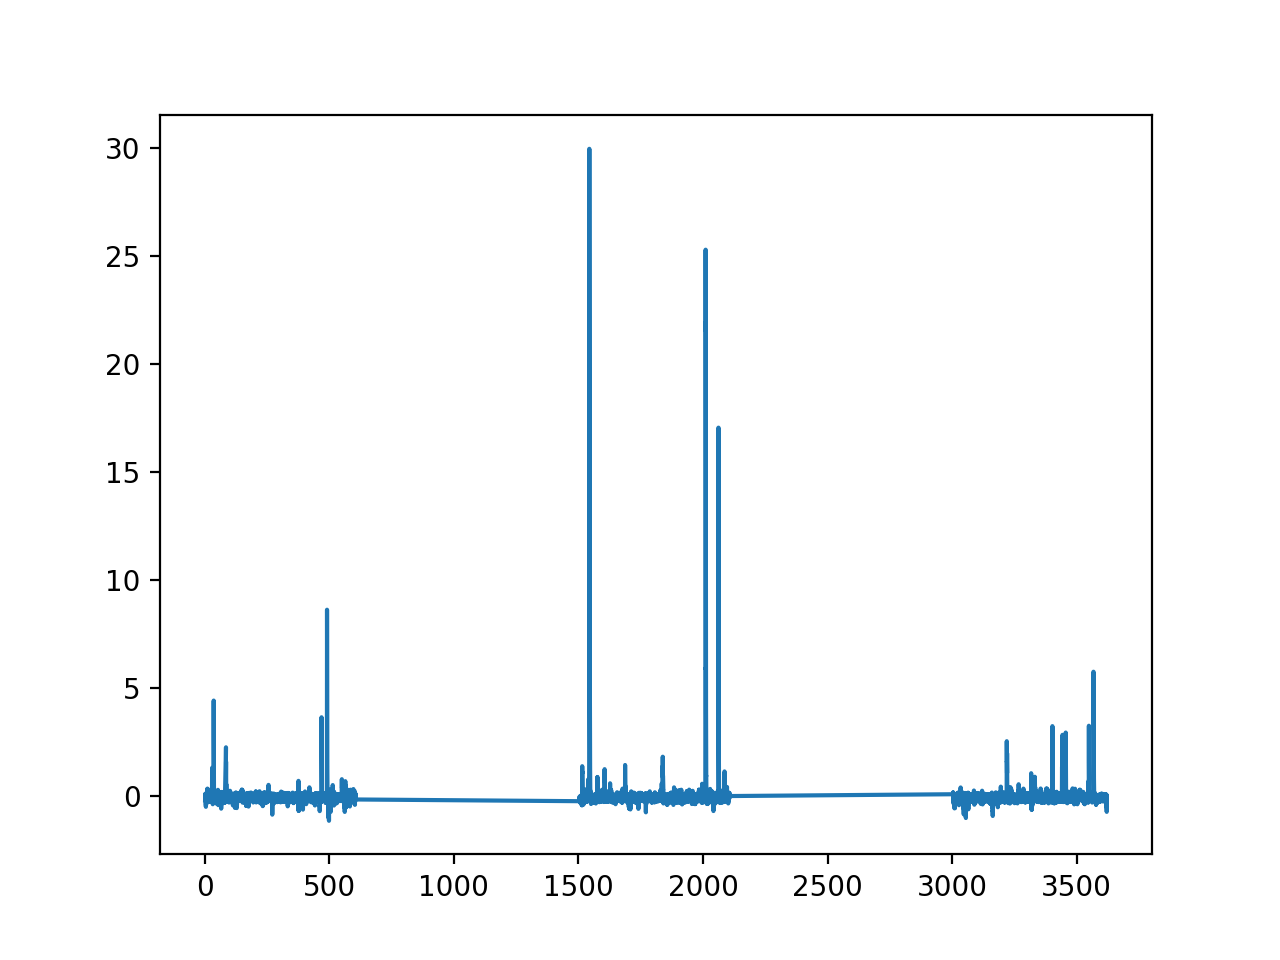

In [119]:
fig, ax = plt.subplots()
ax.plot(
    session.ophys_timestamps,
    session.dff_traces.loc['M351181_C000']['dff']
)

In [137]:
session.running_speed

,timestamps,frame,speed,dx,v_sig,v_in,nearest_ophys_time,time_to_nearest_ophys
0,25.13277,0,46.582981,73.150836,1.0110,4.973,25.14120,0.00843
1,25.19958,1,46.493030,31.022113,1.4380,4.973,25.19121,0.00837
2,25.26638,2,53.020847,32.229073,1.8840,4.973,25.29123,0.02485
3,25.31611,3,65.238100,32.359312,2.3300,4.970,25.29123,0.02488
4,25.34972,4,59.281616,24.599271,2.6700,4.973,25.34125,0.00847
...,...,...,...,...,...,...,...,...
94181,3625.00825,94181,4.830858,1.305258,1.1920,4.973,3625.01578,0.00753
94182,3625.04152,94182,7.208661,2.050261,1.2200,4.970,3625.06579,0.02427
94183,3625.07482,94183,8.690980,3.083826,1.2630,4.973,3625.06579,0.00903
94184,3625.10809,94184,8.873640,2.953849,1.3040,4.973,3625.11580,0.00771


In [89]:
session.ophys_timestamps[np.argmin(np.abs(19 - session.ophys_timestamps))]

18.99389

In [90]:
def get_nearest_ophys_timestamp(t, ophys_timestamps):
    return ophys_timestamps[np.argmin(np.abs(t - ophys_timestamps))]

In [93]:
session.running_speed['nearest_ophys_time'] = session.running_speed['timestamps'].apply(lambda t: get_nearest_ophys_timestamp(t, session.ophys_timestamps))
session.running_speed['time_to_nearest_ophys'] = session.running_speed['timestamps'] - session.running_speed['nearest_ophys_time']

<IPython.core.display.Javascript object>


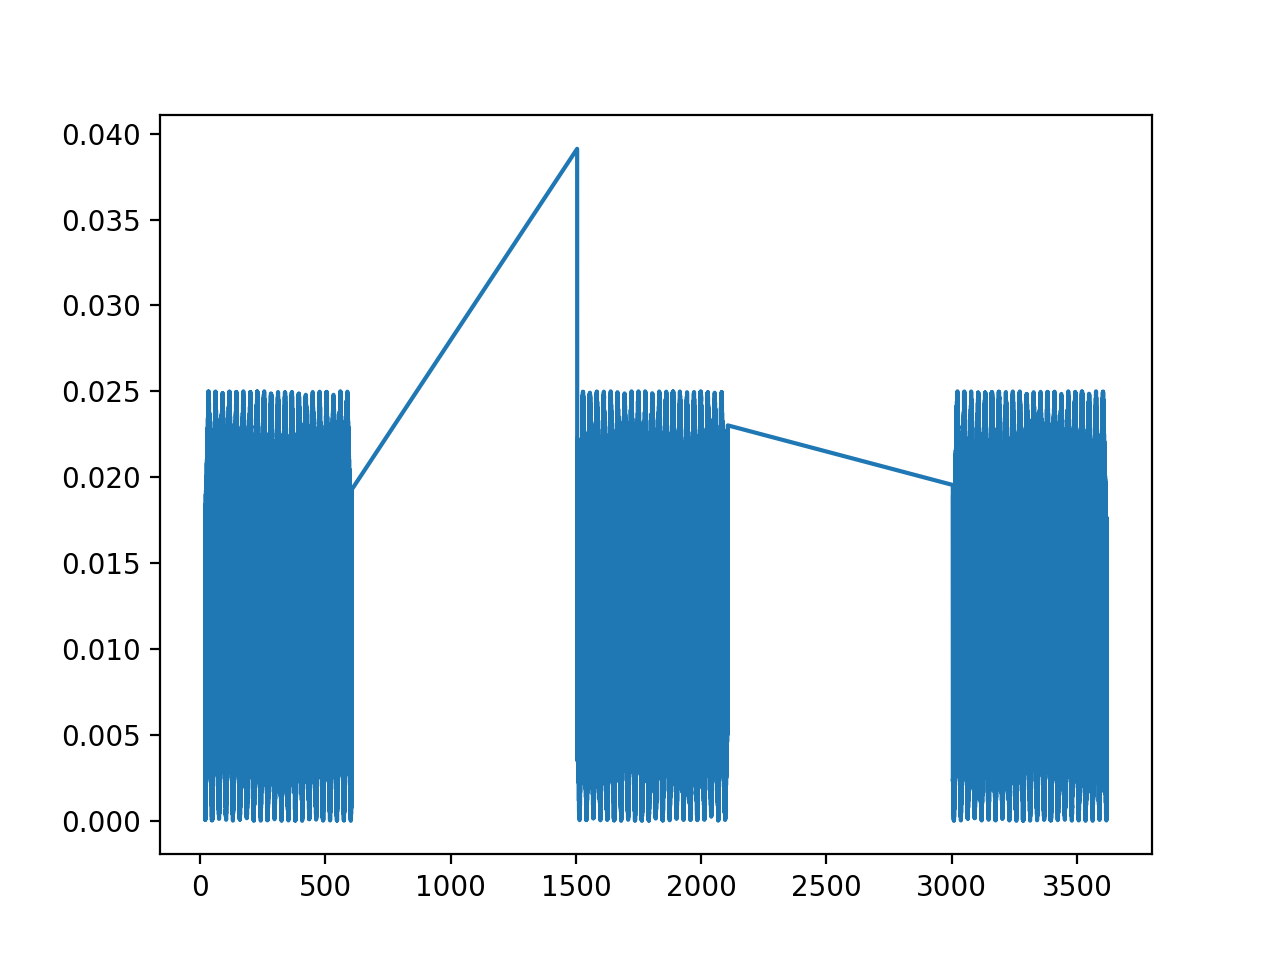

In [106]:
fig, ax = plt.subplots()
ax.plot(
    session.running_speed['timestamps'],
    session.running_speed['time_to_nearest_ophys']
)

In [156]:
pd.to_pickle?

In [191]:
x =np.array([[1,2], [3,np.nan]])
np.any(pd.isnull(x))

True

In [229]:
session = helper_functions.AllenSDKExperiment(session_dict['M348126'])

glm = GLM(
    ophys_experiment_id = None,
    version = 'claustrum_active',
    NO_DROPOUTS = True,
    TESTING = False,
    log_results=False, 
    log_weights=False,
    gft_import='current',
    session=session
)

Fitting ophys_experiment_id: None
WARNING! NO_DROPOUTS=True in fit_experiment(), dropout analysis will NOT run
Loading data
Processing df/f data
Build Design Matrix
    Adding kernel: intercept
    Adding kernel: time
    Adding kernel: licks
    Adding kernel: lick_bouts
    Adding kernel: rewards
    Adding kernel: change
    Adding kernel: hits
    Adding kernel: misses
    Adding kernel: passive_change
	Error encountered while adding kernel for passive_change. Attemping to continue without this kernel.
	Passive Change kernel cant be added to active sessions
    Adding kernel: false_alarms
    Adding kernel: correct_rejects
    Adding kernel: omissions
	Error encountered while adding kernel for omissions. Attemping to continue without this kernel.
	Less than minimum number of events: 0 omissions
    Adding kernel: running
                 : Normalized by max value: 100
    Adding kernel: pupil
	Error encountered while adding kernel for pupil. Attemping to continue without this kerne

    Fitting L2, 0.1:   0%|          | 0/5 [00:00<?, ?it/s]

The following kernels failed to be added to the model: 
{'passive_change', 'model_bias', 'face_motion_PC_3', 'omissions', 'model_omissions1', 'face_motion_PC_0', 'face_motion_PC_4', 'model_timing1D', 'model_task0', 'face_motion_PC_1', 'pupil', 'face_motion_PC_2'}

The following dropouts failed to be added to the model: 
{'face_motion_energy', 'single-beh_model', 'single-face_motion_energy', 'single-face_motion_PC_3', 'single-expectation', 'single-passive_change', 'single-face_motion_PC_2', 'single-omissions', 'single-model_timing1D', 'single-model_omissions1', 'single-model_task0', 'beh_model', 'single-face_motion_PC_1', 'expectation', 'single-pupil_and_omissions', 'single-model_bias', 'pupil_and_omissions', 'single-pupil', 'single-face_motion_PC_4', 'single-face_motion_PC_0'}

Setting up CV
Evaluating Regularization values
Evaluating a grid of regularization values
INSIDE FIT REGULARIZED


    Fitting L2, 0.1:  20%|██        | 1/5 [00:01<00:04,  1.19s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 0.1:  40%|████      | 2/5 [00:02<00:03,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 0.1:  60%|██████    | 3/5 [00:03<00:02,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 0.1:  80%|████████  | 4/5 [00:04<00:01,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 12.917948717948716:   0%|          | 0/5 [00:00<?, ?it/s]

INSIDE FIT REGULARIZED


    Fitting L2, 12.917948717948716:  20%|██        | 1/5 [00:01<00:04,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 12.917948717948716:  40%|████      | 2/5 [00:02<00:03,  1.22s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 12.917948717948716:  60%|██████    | 3/5 [00:03<00:02,  1.22s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 12.917948717948716:  80%|████████  | 4/5 [00:04<00:01,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 25.735897435897435:   0%|          | 0/5 [00:00<?, ?it/s]

INSIDE FIT REGULARIZED


    Fitting L2, 25.735897435897435:  20%|██        | 1/5 [00:01<00:05,  1.27s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 25.735897435897435:  40%|████      | 2/5 [00:02<00:03,  1.27s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 25.735897435897435:  60%|██████    | 3/5 [00:03<00:02,  1.26s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 25.735897435897435:  80%|████████  | 4/5 [00:05<00:01,  1.24s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 38.55384615384615:   0%|          | 0/5 [00:00<?, ?it/s]

INSIDE FIT REGULARIZED


    Fitting L2, 38.55384615384615:  20%|██        | 1/5 [00:01<00:04,  1.22s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 38.55384615384615:  40%|████      | 2/5 [00:02<00:03,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 38.55384615384615:  60%|██████    | 3/5 [00:03<00:02,  1.24s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 38.55384615384615:  80%|████████  | 4/5 [00:04<00:01,  1.24s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 51.37179487179487:   0%|          | 0/5 [00:00<?, ?it/s]

INSIDE FIT REGULARIZED


    Fitting L2, 51.37179487179487:  20%|██        | 1/5 [00:01<00:05,  1.31s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 51.37179487179487:  40%|████      | 2/5 [00:02<00:03,  1.26s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 51.37179487179487:  60%|██████    | 3/5 [00:03<00:02,  1.25s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 51.37179487179487:  80%|████████  | 4/5 [00:05<00:01,  1.26s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 64.18974358974359:   0%|          | 0/5 [00:00<?, ?it/s]

INSIDE FIT REGULARIZED


    Fitting L2, 64.18974358974359:  20%|██        | 1/5 [00:01<00:04,  1.22s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 64.18974358974359:  40%|████      | 2/5 [00:02<00:03,  1.24s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 64.18974358974359:  60%|██████    | 3/5 [00:03<00:02,  1.24s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 64.18974358974359:  80%|████████  | 4/5 [00:04<00:01,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 77.0076923076923:   0%|          | 0/5 [00:00<?, ?it/s]

INSIDE FIT REGULARIZED


    Fitting L2, 77.0076923076923:  20%|██        | 1/5 [00:01<00:04,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 77.0076923076923:  40%|████      | 2/5 [00:02<00:03,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 77.0076923076923:  60%|██████    | 3/5 [00:03<00:02,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 77.0076923076923:  80%|████████  | 4/5 [00:04<00:01,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 89.825641025641:   0%|          | 0/5 [00:00<?, ?it/s]

INSIDE FIT REGULARIZED


    Fitting L2, 89.825641025641:  20%|██        | 1/5 [00:01<00:04,  1.22s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 89.825641025641:  40%|████      | 2/5 [00:02<00:03,  1.24s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 89.825641025641:  60%|██████    | 3/5 [00:03<00:02,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 89.825641025641:  80%|████████  | 4/5 [00:04<00:01,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 102.64358974358973:   0%|          | 0/5 [00:00<?, ?it/s]

INSIDE FIT REGULARIZED


    Fitting L2, 102.64358974358973:  20%|██        | 1/5 [00:01<00:04,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 102.64358974358973:  40%|████      | 2/5 [00:02<00:03,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 102.64358974358973:  60%|██████    | 3/5 [00:03<00:02,  1.24s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 102.64358974358973:  80%|████████  | 4/5 [00:04<00:01,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 115.46153846153845:   0%|          | 0/5 [00:00<?, ?it/s]

INSIDE FIT REGULARIZED


    Fitting L2, 115.46153846153845:  20%|██        | 1/5 [00:01<00:05,  1.29s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 115.46153846153845:  40%|████      | 2/5 [00:02<00:03,  1.26s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 115.46153846153845:  60%|██████    | 3/5 [00:03<00:02,  1.24s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 115.46153846153845:  80%|████████  | 4/5 [00:04<00:01,  1.24s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 128.27948717948718:   0%|          | 0/5 [00:00<?, ?it/s]

INSIDE FIT REGULARIZED


    Fitting L2, 128.27948717948718:  20%|██        | 1/5 [00:01<00:04,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 128.27948717948718:  40%|████      | 2/5 [00:02<00:03,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 128.27948717948718:  60%|██████    | 3/5 [00:03<00:02,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 128.27948717948718:  80%|████████  | 4/5 [00:04<00:01,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 141.09743589743587:   0%|          | 0/5 [00:00<?, ?it/s]

INSIDE FIT REGULARIZED


    Fitting L2, 141.09743589743587:  20%|██        | 1/5 [00:01<00:04,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 141.09743589743587:  40%|████      | 2/5 [00:02<00:03,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 141.09743589743587:  60%|██████    | 3/5 [00:03<00:02,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 141.09743589743587:  80%|████████  | 4/5 [00:04<00:01,  1.25s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 153.9153846153846:   0%|          | 0/5 [00:00<?, ?it/s]

INSIDE FIT REGULARIZED


    Fitting L2, 153.9153846153846:  20%|██        | 1/5 [00:01<00:04,  1.24s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 153.9153846153846:  40%|████      | 2/5 [00:02<00:03,  1.24s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 153.9153846153846:  60%|██████    | 3/5 [00:03<00:02,  1.24s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 153.9153846153846:  80%|████████  | 4/5 [00:04<00:01,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 166.73333333333332:   0%|          | 0/5 [00:00<?, ?it/s]

INSIDE FIT REGULARIZED


    Fitting L2, 166.73333333333332:  20%|██        | 1/5 [00:01<00:04,  1.22s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 166.73333333333332:  40%|████      | 2/5 [00:02<00:03,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 166.73333333333332:  60%|██████    | 3/5 [00:03<00:02,  1.26s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 166.73333333333332:  80%|████████  | 4/5 [00:04<00:01,  1.25s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 179.55128205128202:   0%|          | 0/5 [00:00<?, ?it/s]

INSIDE FIT REGULARIZED


    Fitting L2, 179.55128205128202:  20%|██        | 1/5 [00:01<00:04,  1.24s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 179.55128205128202:  40%|████      | 2/5 [00:02<00:03,  1.24s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 179.55128205128202:  60%|██████    | 3/5 [00:03<00:02,  1.24s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 179.55128205128202:  80%|████████  | 4/5 [00:04<00:01,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 192.36923076923074:   0%|          | 0/5 [00:00<?, ?it/s]

INSIDE FIT REGULARIZED


    Fitting L2, 192.36923076923074:  20%|██        | 1/5 [00:01<00:04,  1.22s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 192.36923076923074:  40%|████      | 2/5 [00:02<00:03,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 192.36923076923074:  60%|██████    | 3/5 [00:03<00:02,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 192.36923076923074:  80%|████████  | 4/5 [00:04<00:01,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 205.18717948717946:   0%|          | 0/5 [00:00<?, ?it/s]

INSIDE FIT REGULARIZED


    Fitting L2, 205.18717948717946:  20%|██        | 1/5 [00:01<00:04,  1.25s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 205.18717948717946:  40%|████      | 2/5 [00:02<00:03,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 205.18717948717946:  60%|██████    | 3/5 [00:03<00:02,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 205.18717948717946:  80%|████████  | 4/5 [00:04<00:01,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 218.0051282051282:   0%|          | 0/5 [00:00<?, ?it/s]

INSIDE FIT REGULARIZED


    Fitting L2, 218.0051282051282:  20%|██        | 1/5 [00:01<00:04,  1.22s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 218.0051282051282:  40%|████      | 2/5 [00:02<00:03,  1.25s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 218.0051282051282:  60%|██████    | 3/5 [00:03<00:02,  1.24s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 218.0051282051282:  80%|████████  | 4/5 [00:04<00:01,  1.24s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 230.8230769230769:   0%|          | 0/5 [00:00<?, ?it/s]

INSIDE FIT REGULARIZED


    Fitting L2, 230.8230769230769:  20%|██        | 1/5 [00:01<00:04,  1.24s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 230.8230769230769:  40%|████      | 2/5 [00:02<00:03,  1.27s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 230.8230769230769:  60%|██████    | 3/5 [00:03<00:02,  1.30s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 230.8230769230769:  80%|████████  | 4/5 [00:05<00:01,  1.27s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 243.6410256410256:   0%|          | 0/5 [00:00<?, ?it/s]

INSIDE FIT REGULARIZED


    Fitting L2, 243.6410256410256:  20%|██        | 1/5 [00:01<00:04,  1.24s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 243.6410256410256:  40%|████      | 2/5 [00:02<00:03,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 243.6410256410256:  60%|██████    | 3/5 [00:03<00:02,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 243.6410256410256:  80%|████████  | 4/5 [00:04<00:01,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 256.4589743589744:   0%|          | 0/5 [00:00<?, ?it/s]

INSIDE FIT REGULARIZED


    Fitting L2, 256.4589743589744:  20%|██        | 1/5 [00:01<00:04,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 256.4589743589744:  40%|████      | 2/5 [00:02<00:03,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 256.4589743589744:  60%|██████    | 3/5 [00:03<00:02,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 256.4589743589744:  80%|████████  | 4/5 [00:04<00:01,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 269.2769230769231:   0%|          | 0/5 [00:00<?, ?it/s]

INSIDE FIT REGULARIZED


    Fitting L2, 269.2769230769231:  20%|██        | 1/5 [00:01<00:04,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 269.2769230769231:  40%|████      | 2/5 [00:02<00:03,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 269.2769230769231:  60%|██████    | 3/5 [00:03<00:02,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 269.2769230769231:  80%|████████  | 4/5 [00:04<00:01,  1.24s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 282.0948717948718:   0%|          | 0/5 [00:00<?, ?it/s]

INSIDE FIT REGULARIZED


    Fitting L2, 282.0948717948718:  20%|██        | 1/5 [00:01<00:04,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 282.0948717948718:  40%|████      | 2/5 [00:02<00:03,  1.25s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 282.0948717948718:  60%|██████    | 3/5 [00:03<00:02,  1.24s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 282.0948717948718:  80%|████████  | 4/5 [00:04<00:01,  1.24s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 294.91282051282053:   0%|          | 0/5 [00:00<?, ?it/s]

INSIDE FIT REGULARIZED


    Fitting L2, 294.91282051282053:  20%|██        | 1/5 [00:01<00:04,  1.22s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 294.91282051282053:  40%|████      | 2/5 [00:02<00:03,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 294.91282051282053:  60%|██████    | 3/5 [00:03<00:02,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 294.91282051282053:  80%|████████  | 4/5 [00:04<00:01,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 307.7307692307692:   0%|          | 0/5 [00:00<?, ?it/s]

INSIDE FIT REGULARIZED


    Fitting L2, 307.7307692307692:  20%|██        | 1/5 [00:01<00:04,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 307.7307692307692:  40%|████      | 2/5 [00:02<00:03,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 307.7307692307692:  60%|██████    | 3/5 [00:03<00:02,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 307.7307692307692:  80%|████████  | 4/5 [00:04<00:01,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 320.5487179487179:   0%|          | 0/5 [00:00<?, ?it/s]

INSIDE FIT REGULARIZED


    Fitting L2, 320.5487179487179:  20%|██        | 1/5 [00:01<00:04,  1.22s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 320.5487179487179:  40%|████      | 2/5 [00:02<00:03,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 320.5487179487179:  60%|██████    | 3/5 [00:03<00:02,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 320.5487179487179:  80%|████████  | 4/5 [00:04<00:01,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 333.3666666666667:   0%|          | 0/5 [00:00<?, ?it/s]

INSIDE FIT REGULARIZED


    Fitting L2, 333.3666666666667:  20%|██        | 1/5 [00:01<00:04,  1.25s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 333.3666666666667:  40%|████      | 2/5 [00:02<00:03,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 333.3666666666667:  60%|██████    | 3/5 [00:03<00:02,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 333.3666666666667:  80%|████████  | 4/5 [00:04<00:01,  1.24s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 346.18461538461537:   0%|          | 0/5 [00:00<?, ?it/s]

INSIDE FIT REGULARIZED


    Fitting L2, 346.18461538461537:  20%|██        | 1/5 [00:01<00:04,  1.22s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 346.18461538461537:  40%|████      | 2/5 [00:02<00:03,  1.26s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 346.18461538461537:  60%|██████    | 3/5 [00:03<00:02,  1.25s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 346.18461538461537:  80%|████████  | 4/5 [00:04<00:01,  1.24s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 359.00256410256407:   0%|          | 0/5 [00:00<?, ?it/s]

INSIDE FIT REGULARIZED


    Fitting L2, 359.00256410256407:  20%|██        | 1/5 [00:01<00:04,  1.24s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 359.00256410256407:  40%|████      | 2/5 [00:02<00:03,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 359.00256410256407:  60%|██████    | 3/5 [00:03<00:02,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 359.00256410256407:  80%|████████  | 4/5 [00:04<00:01,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 371.8205128205128:   0%|          | 0/5 [00:00<?, ?it/s]

INSIDE FIT REGULARIZED


    Fitting L2, 371.8205128205128:  20%|██        | 1/5 [00:01<00:04,  1.22s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 371.8205128205128:  40%|████      | 2/5 [00:02<00:03,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 371.8205128205128:  60%|██████    | 3/5 [00:03<00:02,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 371.8205128205128:  80%|████████  | 4/5 [00:04<00:01,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 384.6384615384615:   0%|          | 0/5 [00:00<?, ?it/s]

INSIDE FIT REGULARIZED


    Fitting L2, 384.6384615384615:  20%|██        | 1/5 [00:01<00:04,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 384.6384615384615:  40%|████      | 2/5 [00:02<00:03,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 384.6384615384615:  60%|██████    | 3/5 [00:03<00:02,  1.24s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 384.6384615384615:  80%|████████  | 4/5 [00:04<00:01,  1.24s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 397.45641025641027:   0%|          | 0/5 [00:00<?, ?it/s]

INSIDE FIT REGULARIZED


    Fitting L2, 397.45641025641027:  20%|██        | 1/5 [00:01<00:05,  1.28s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 397.45641025641027:  40%|████      | 2/5 [00:02<00:03,  1.25s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 397.45641025641027:  60%|██████    | 3/5 [00:03<00:02,  1.24s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 397.45641025641027:  80%|████████  | 4/5 [00:05<00:01,  1.27s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 410.27435897435896:   0%|          | 0/5 [00:00<?, ?it/s]

INSIDE FIT REGULARIZED


    Fitting L2, 410.27435897435896:  20%|██        | 1/5 [00:01<00:04,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 410.27435897435896:  40%|████      | 2/5 [00:02<00:03,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 410.27435897435896:  60%|██████    | 3/5 [00:03<00:02,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 410.27435897435896:  80%|████████  | 4/5 [00:04<00:01,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 423.09230769230766:   0%|          | 0/5 [00:00<?, ?it/s]

INSIDE FIT REGULARIZED


    Fitting L2, 423.09230769230766:  20%|██        | 1/5 [00:01<00:04,  1.24s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 423.09230769230766:  40%|████      | 2/5 [00:02<00:03,  1.24s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 423.09230769230766:  60%|██████    | 3/5 [00:03<00:02,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 423.09230769230766:  80%|████████  | 4/5 [00:04<00:01,  1.24s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 435.9102564102564:   0%|          | 0/5 [00:00<?, ?it/s]

INSIDE FIT REGULARIZED


    Fitting L2, 435.9102564102564:  20%|██        | 1/5 [00:01<00:04,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 435.9102564102564:  40%|████      | 2/5 [00:02<00:03,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 435.9102564102564:  60%|██████    | 3/5 [00:03<00:02,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 435.9102564102564:  80%|████████  | 4/5 [00:04<00:01,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 448.7282051282051:   0%|          | 0/5 [00:00<?, ?it/s]

INSIDE FIT REGULARIZED


    Fitting L2, 448.7282051282051:  20%|██        | 1/5 [00:01<00:04,  1.22s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 448.7282051282051:  40%|████      | 2/5 [00:02<00:03,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 448.7282051282051:  60%|██████    | 3/5 [00:03<00:02,  1.24s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 448.7282051282051:  80%|████████  | 4/5 [00:04<00:01,  1.24s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 461.54615384615386:   0%|          | 0/5 [00:00<?, ?it/s]

INSIDE FIT REGULARIZED


    Fitting L2, 461.54615384615386:  20%|██        | 1/5 [00:01<00:05,  1.29s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 461.54615384615386:  40%|████      | 2/5 [00:02<00:03,  1.25s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 461.54615384615386:  60%|██████    | 3/5 [00:03<00:02,  1.24s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 461.54615384615386:  80%|████████  | 4/5 [00:04<00:01,  1.24s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 474.36410256410255:   0%|          | 0/5 [00:00<?, ?it/s]

INSIDE FIT REGULARIZED


    Fitting L2, 474.36410256410255:  20%|██        | 1/5 [00:01<00:04,  1.22s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 474.36410256410255:  40%|████      | 2/5 [00:02<00:03,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 474.36410256410255:  60%|██████    | 3/5 [00:03<00:02,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 474.36410256410255:  80%|████████  | 4/5 [00:04<00:01,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 487.18205128205125:   0%|          | 0/5 [00:00<?, ?it/s]

INSIDE FIT REGULARIZED


    Fitting L2, 487.18205128205125:  20%|██        | 1/5 [00:01<00:05,  1.28s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 487.18205128205125:  40%|████      | 2/5 [00:02<00:03,  1.24s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 487.18205128205125:  60%|██████    | 3/5 [00:03<00:02,  1.24s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 487.18205128205125:  80%|████████  | 4/5 [00:04<00:01,  1.24s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 500.0:   0%|          | 0/5 [00:00<?, ?it/s]

INSIDE FIT REGULARIZED


    Fitting L2, 500.0:  20%|██        | 1/5 [00:01<00:04,  1.22s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 500.0:  40%|████      | 2/5 [00:02<00:03,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 500.0:  60%|██████    | 3/5 [00:03<00:02,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 500.0:  80%|████████  | 4/5 [00:04<00:01,  1.23s/it]

INSIDE FIT REGULARIZED


    Fitting L2, 500.0: 100%|██████████| 5/5 [00:06<00:00,  1.22s/it]


Setting up model selection dropout
Iterating over model selection
Using a constant regularization value across all cells
INSIDE FIT REGULARIZED


    Fitting model, Full:   0%|          | 0/5 [00:00<?, ?it/s]

INSIDE FIT REGULARIZED


    Fitting model, Full:  20%|██        | 1/5 [00:01<00:06,  1.64s/it]

INSIDE FIT REGULARIZED


    Fitting model, Full:  40%|████      | 2/5 [00:03<00:04,  1.62s/it]

INSIDE FIT REGULARIZED


    Fitting model, Full:  60%|██████    | 3/5 [00:04<00:03,  1.62s/it]

INSIDE FIT REGULARIZED


    Fitting model, Full:  80%|████████  | 4/5 [00:06<00:01,  1.62s/it]

INSIDE FIT REGULARIZED


    Fitting model, Full: 100%|██████████| 5/5 [00:08<00:00,  1.60s/it]


Saving results
Saving Events Table
Finished
done fitting model, collecting results
done collecting results
done building GLM object


In [230]:
glm.results.sort_values(by='Full__avg_cv_var_test', ascending=False)

,Full__avg_cv_var_train,Full__avg_cv_var_test,Full__avg_cv_var_test_full_comparison,Full__avg_cv_adjvar_train,Full__avg_cv_adjvar_test,Full__avg_cv_adjvar_test_full_comparison,Full__absolute_change_from_full,Full__adj_dropout,Full__dropout,cell_roi_id
cell_specimen_id,,,,,,,,,,
M348126_C030,0.770235,0.761507,0.761507,0.770235,0.761507,0.761507,0.0,-0.0,-0.0,M348126_C030
M348126_C041,0.644228,0.621437,0.621437,0.644228,0.621437,0.621437,0.0,-0.0,-0.0,M348126_C041
M348126_C086,0.593496,0.575717,0.575717,0.593496,0.575717,0.575717,0.0,-0.0,-0.0,M348126_C086
M348126_C064,0.560895,0.542080,0.542080,0.560895,0.542080,0.542080,0.0,-0.0,-0.0,M348126_C064
M348126_C050,0.549988,0.534096,0.534096,0.549988,0.534096,0.534096,0.0,-0.0,-0.0,M348126_C050
...,...,...,...,...,...,...,...,...,...,...
M348126_C089,0.062271,0.000000,0.000000,0.062271,0.000000,0.000000,0.0,0.0,0.0,M348126_C089
M348126_C008,0.061321,0.000000,0.000000,0.061321,0.000000,0.000000,0.0,0.0,0.0,M348126_C008
M348126_C001,0.050698,0.000000,0.000000,0.050698,0.000000,0.000000,0.0,0.0,0.0,M348126_C001


<IPython.core.display.Javascript object>


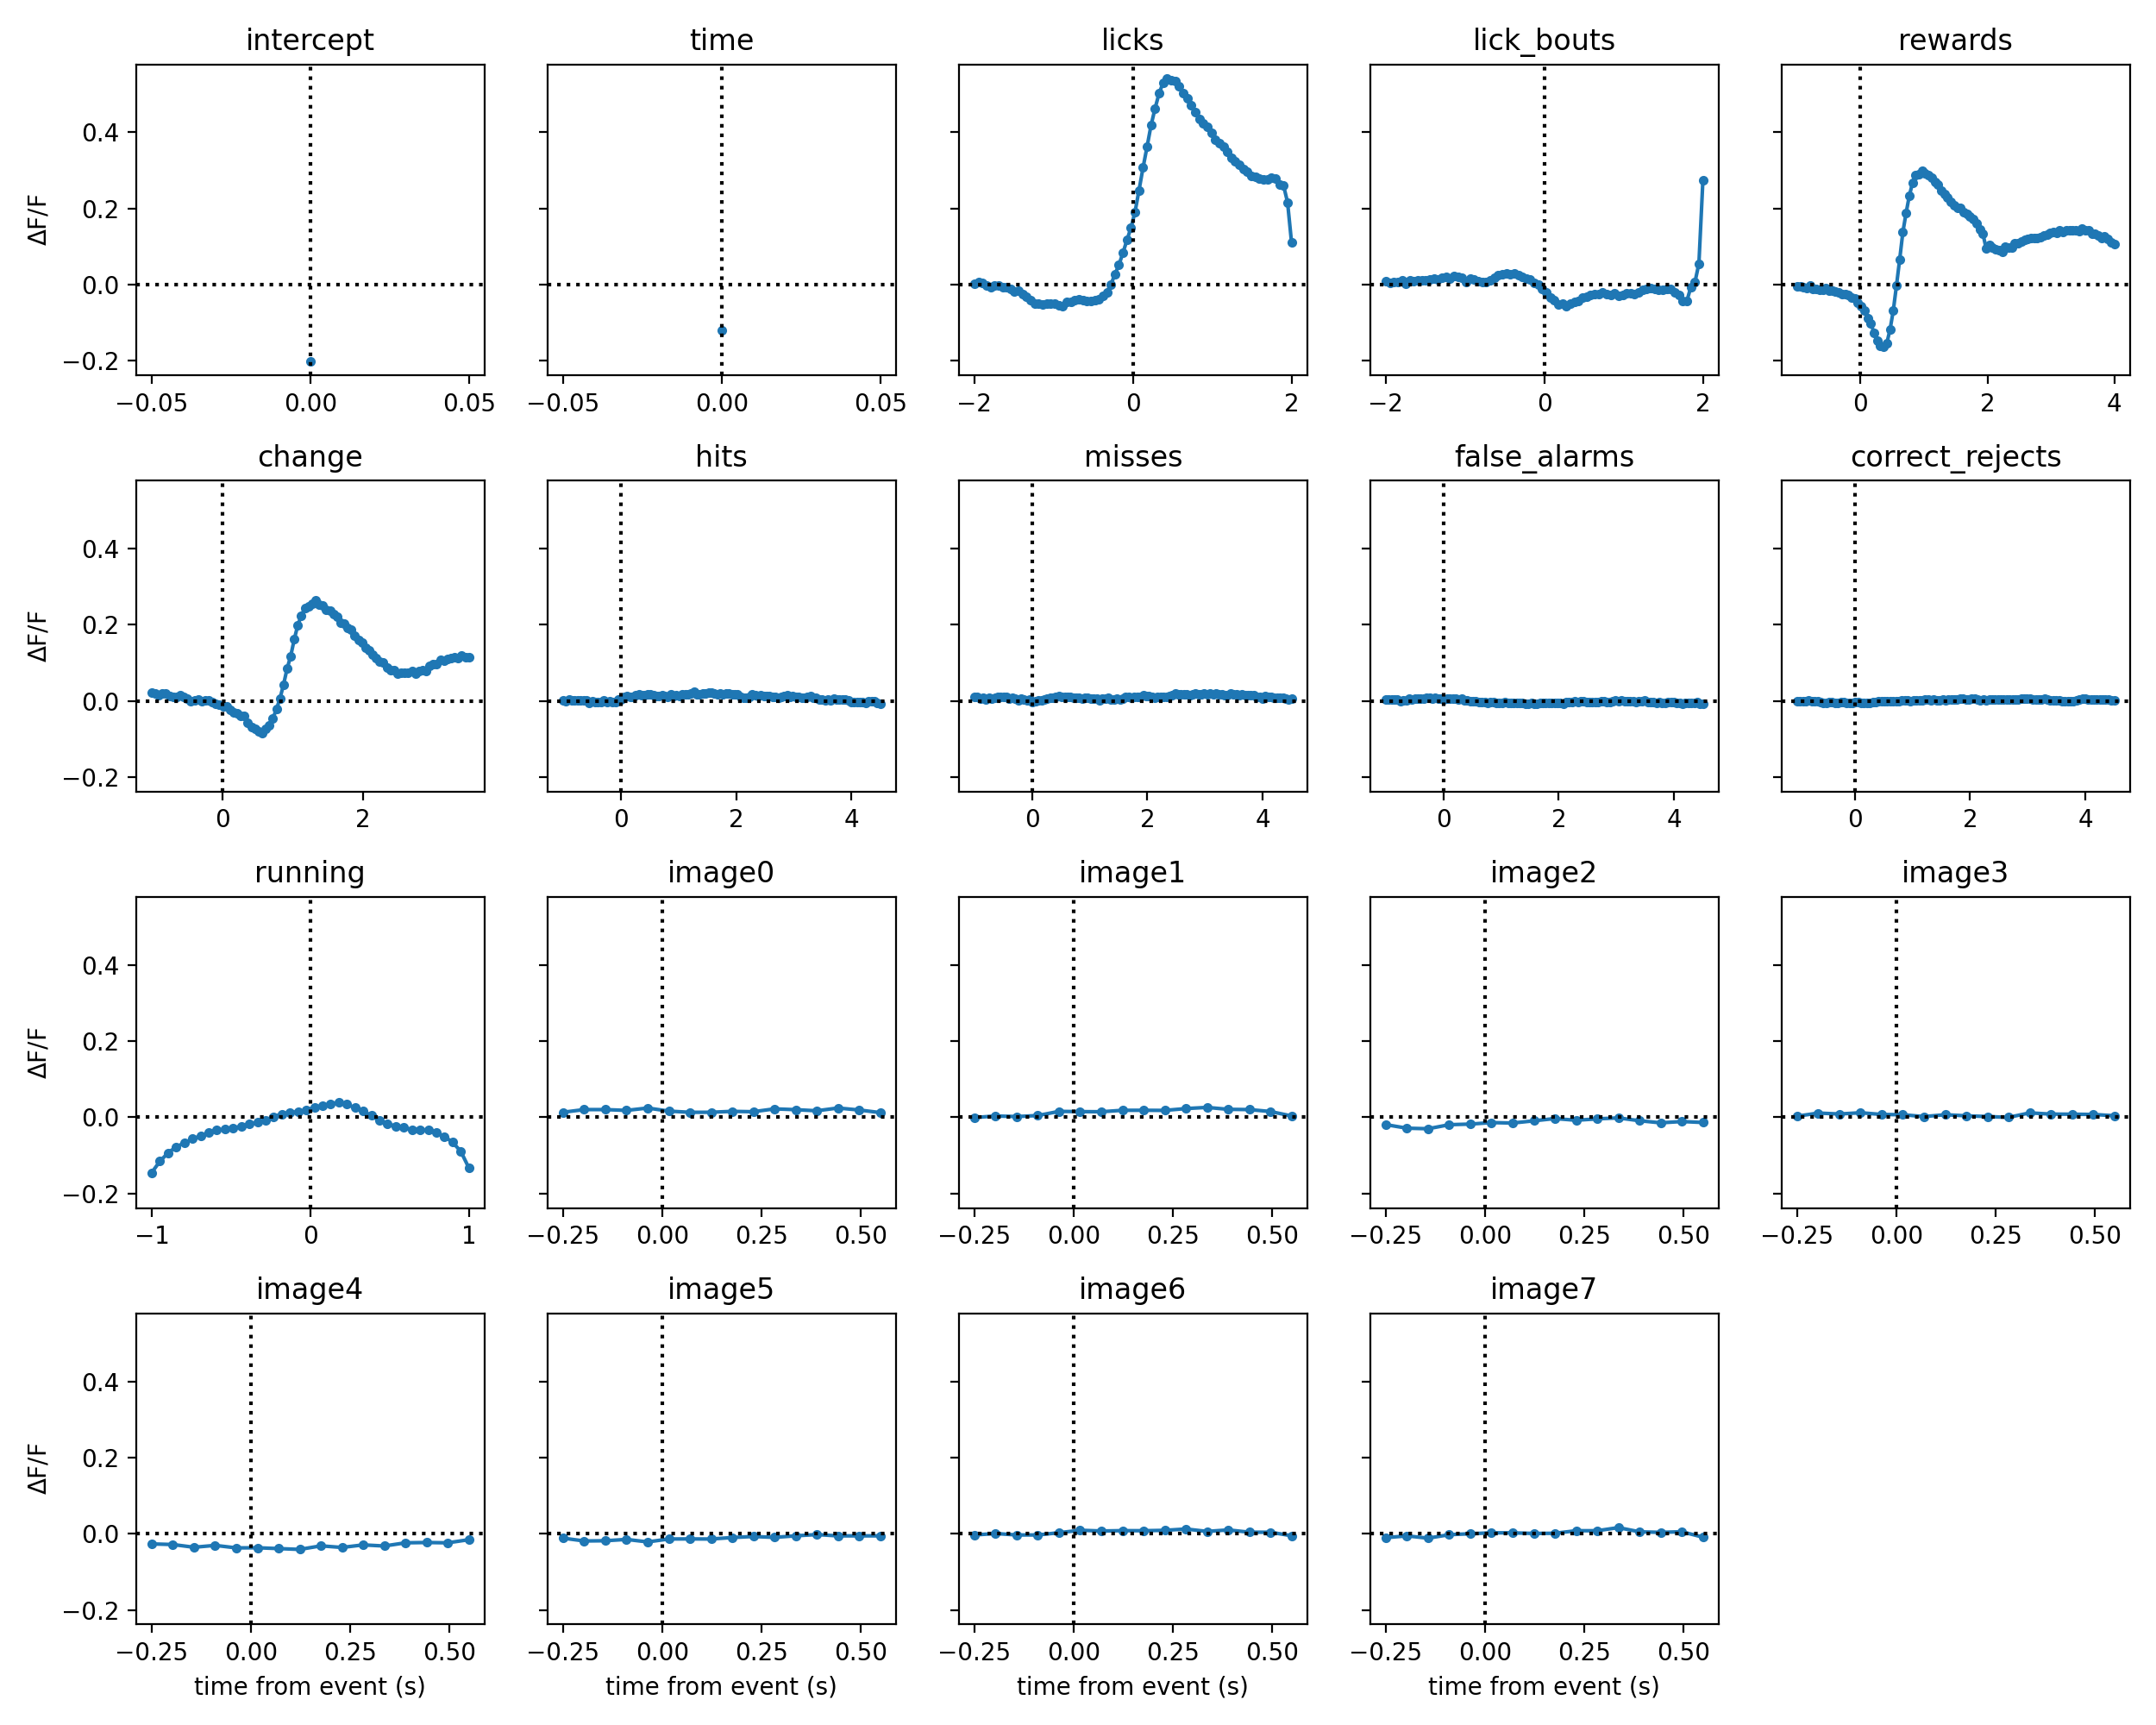

In [247]:
glm.plot_filters('M348126_C030')

<IPython.core.display.Javascript object>


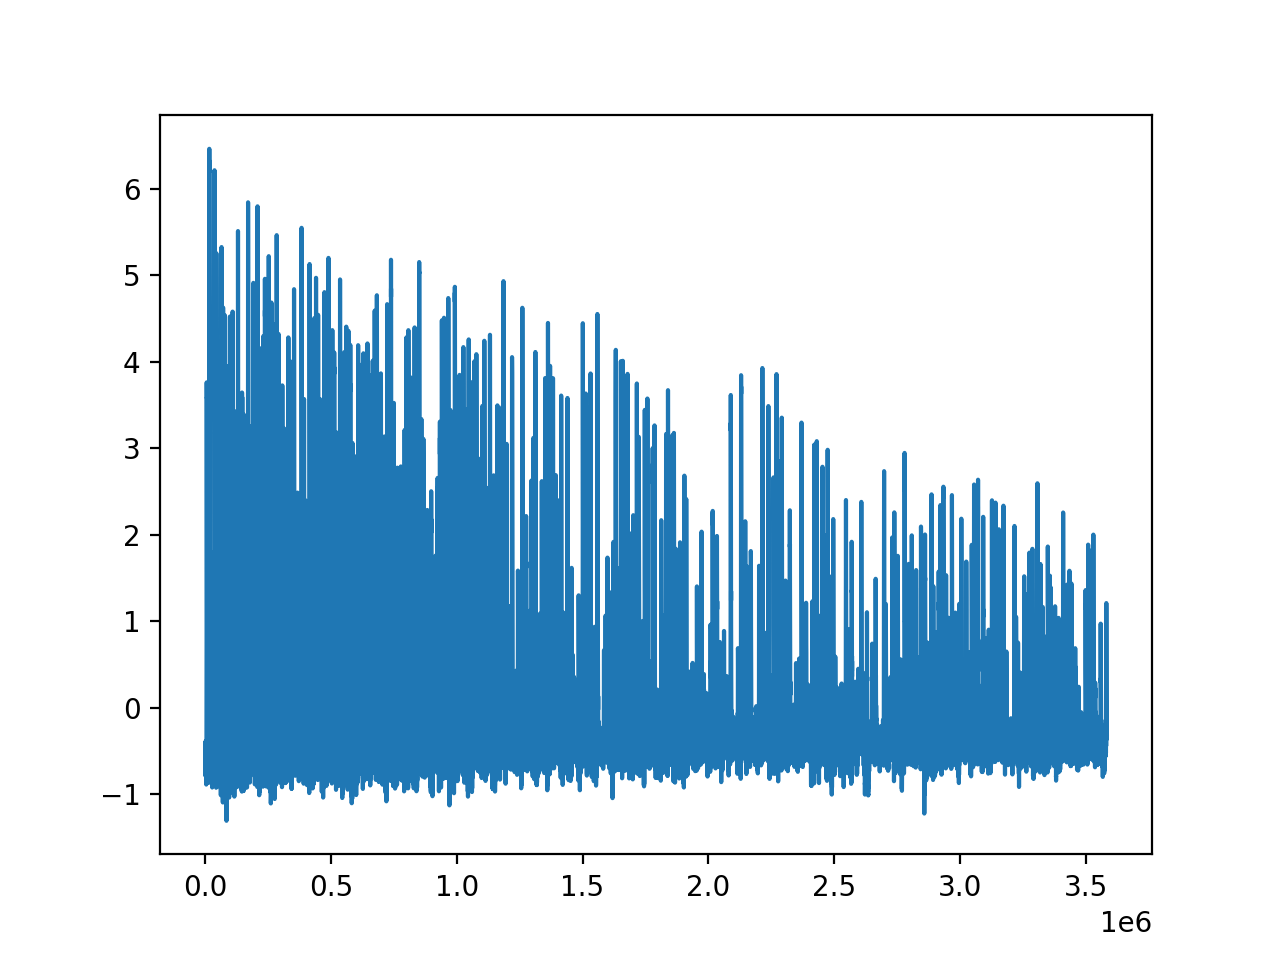

In [243]:
fig, ax = plt.subplots()
ax.plot(glm.cell_results_df.query('cell_specimen_id == "M348126_C041"')['fit_array'])

In [245]:
df = glm.cell_results_df.query('cell_specimen_id == "M348126_C041"').query('fit_trace_timestamps > 100 and fit_trace_timestamps < 240')
df

,index,fit_trace_timestamps,cell_specimen_id,fit_array,dff,model_prediction,frame_index
145051,145051,100.00837,M348126_C041,-0.491536,-0.491536,-0.260488,1939
145148,145148,100.05838,M348126_C041,-0.658783,-0.658783,-0.274954,1940
145245,145245,100.10839,M348126_C041,-0.580871,-0.580871,-0.291755,1941
145342,145342,100.15841,M348126_C041,-0.754747,-0.754747,-0.300277,1942
145439,145439,100.20842,M348126_C041,-0.793385,-0.793385,-0.322473,1943
...,...,...,...,...,...,...,...
416166,416166,239.79042,M348126_C041,2.769319,2.769319,0.789778,4734
416263,416263,239.84043,M348126_C041,2.666929,2.666929,0.653558,4735
416360,416360,239.89044,M348126_C041,2.404112,2.404112,0.517186,4736
416457,416457,239.94045,M348126_C041,2.022645,2.022645,0.412682,4737


<IPython.core.display.Javascript object>


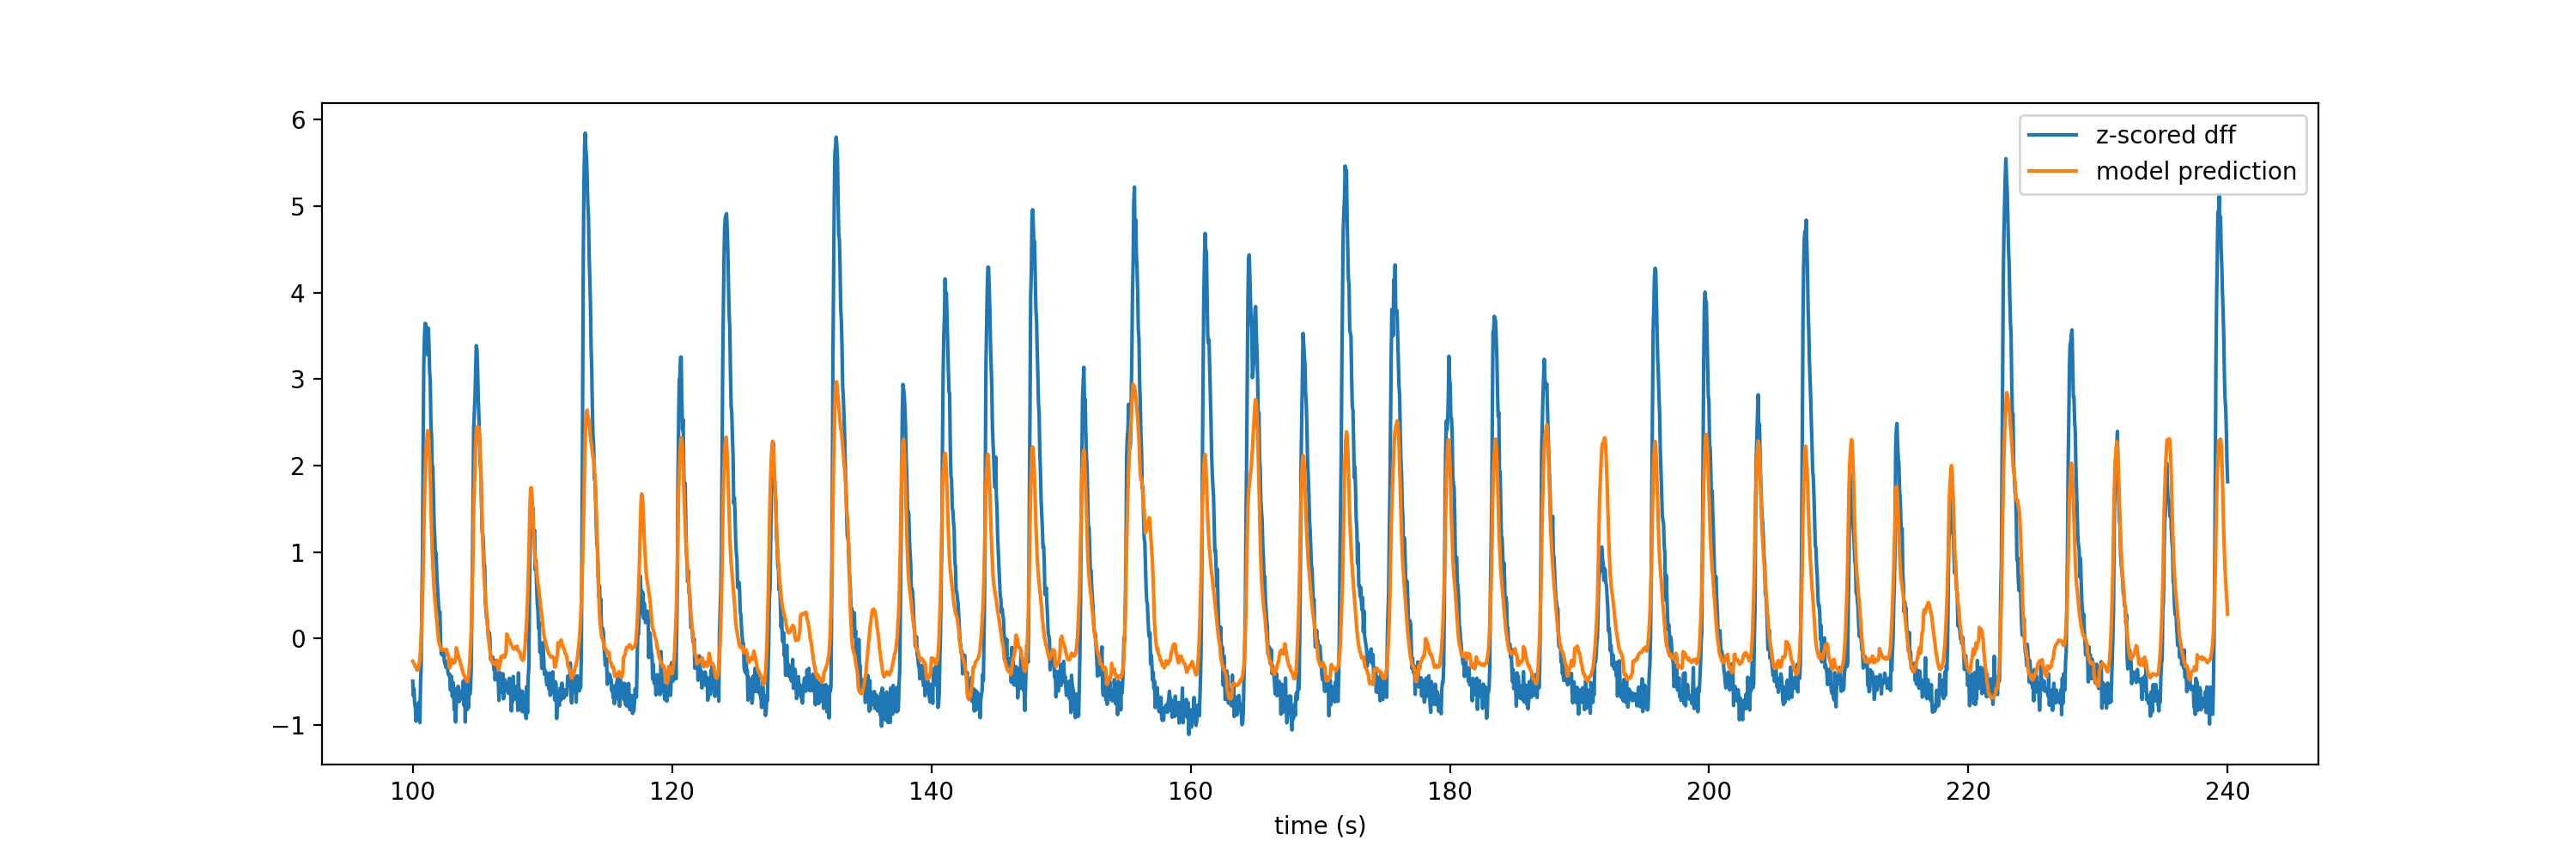

Text(0.5, 0, 'time (s)')

In [246]:
fig, ax = plt.subplots(figsize = (15,5))
ax.plot(df['fit_trace_timestamps'], df['fit_array'])
ax.plot(df['fit_trace_timestamps'], df['model_prediction'])
ax.legend(['z-scored dff', 'model prediction'])
ax.set_xlabel('time (s)')

In [129]:
glm.cell_results_df.query('cell_specimen_id == "M351181_C059"')

,index,fit_trace_timestamps,cell_specimen_id,fit_array,dff,model_prediction,frame_index


<IPython.core.display.Javascript object>


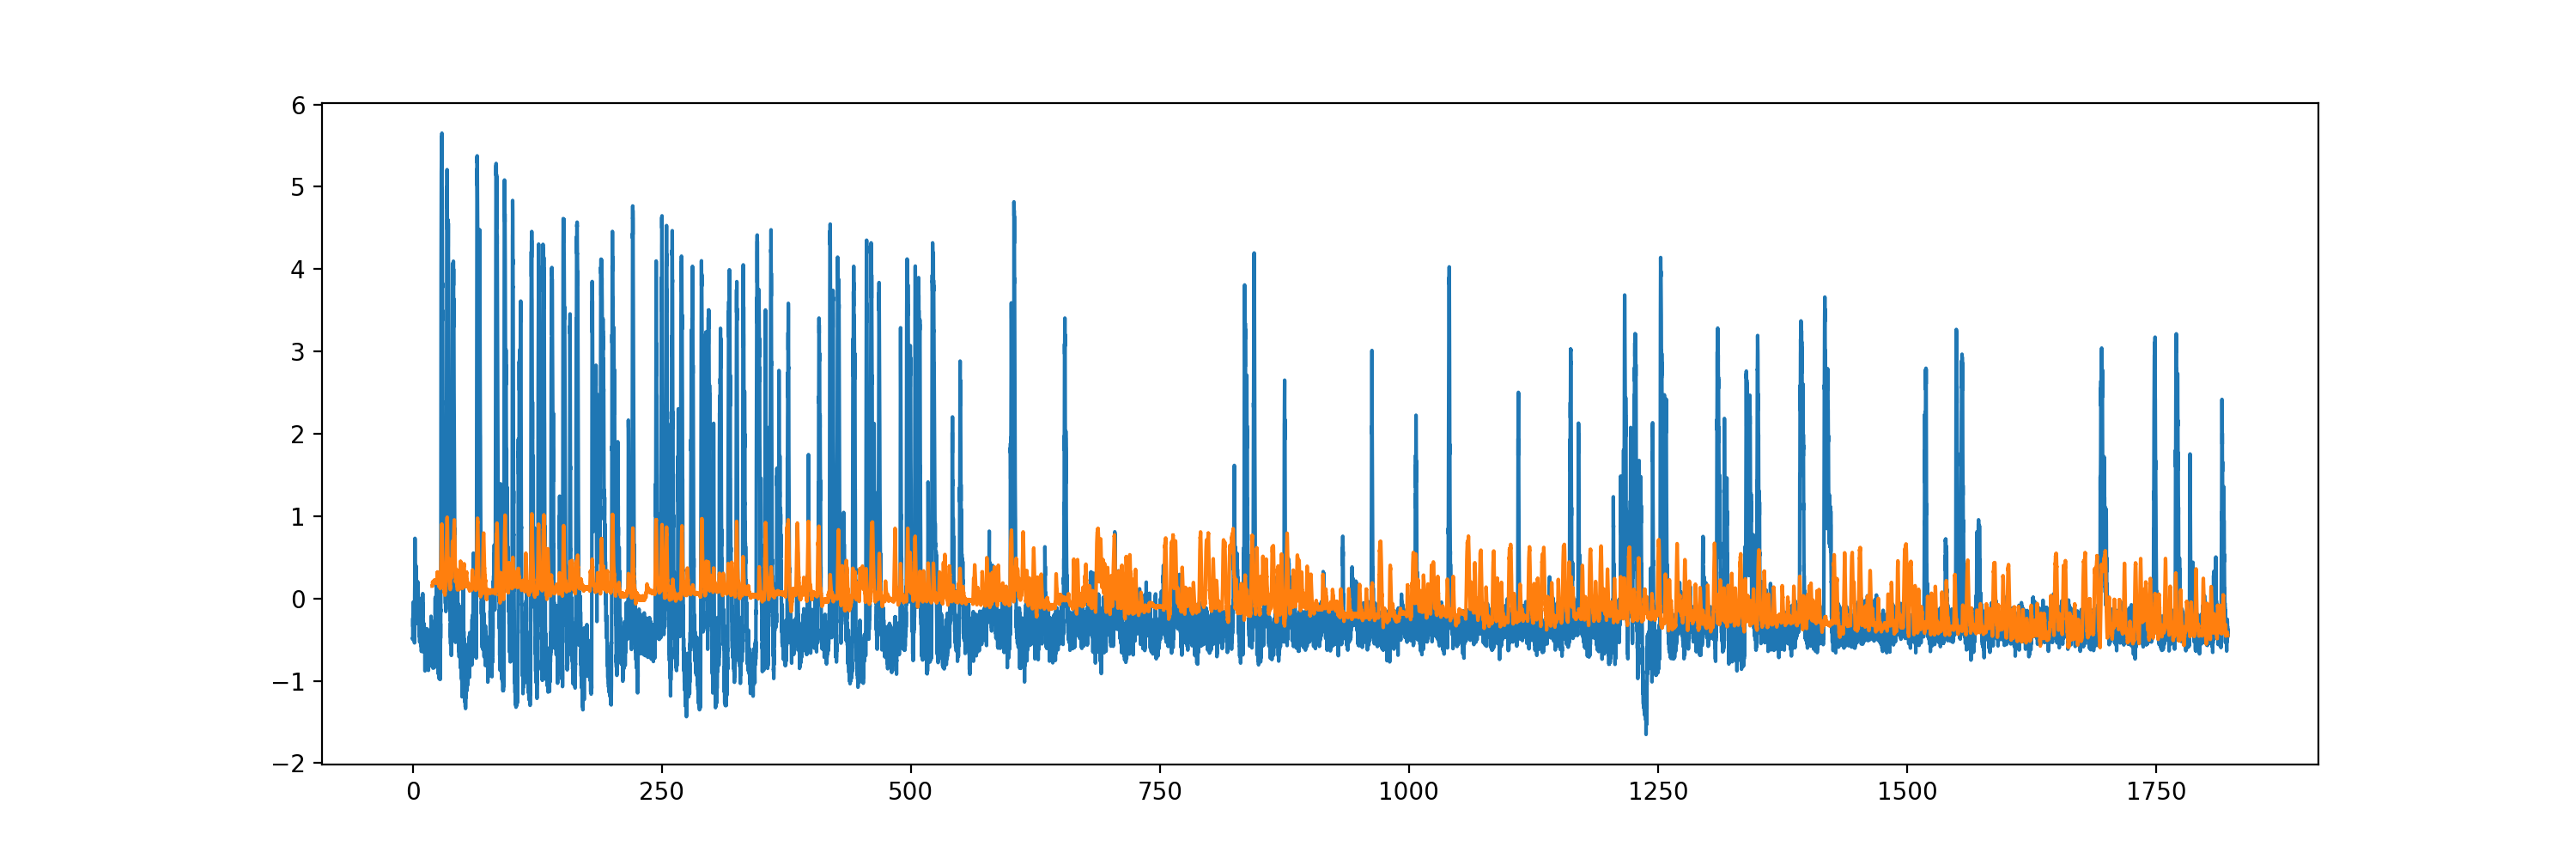

In [21]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(
    session.ophys_timestamps,
    session.dff_traces.loc['M351181_C083']['dff'],
)

ax.plot(
    glm.cell_results_df.query('cell_specimen_id == "M351181_C083"')['fit_trace_timestamps'],
    glm.cell_results_df.query('cell_specimen_id == "M351181_C083"')['model_prediction'],
)

In [260]:
list(X.coords['weights'].values)

['intercept_0',
 'time_0',
 'licks_-40',
 'licks_-39',
 'licks_-38',
 'licks_-37',
 'licks_-36',
 'licks_-35',
 'licks_-34',
 'licks_-33',
 'licks_-32',
 'licks_-31',
 'licks_-30',
 'licks_-29',
 'licks_-28',
 'licks_-27',
 'licks_-26',
 'licks_-25',
 'licks_-24',
 'licks_-23',
 'licks_-22',
 'licks_-21',
 'licks_-20',
 'licks_-19',
 'licks_-18',
 'licks_-17',
 'licks_-16',
 'licks_-15',
 'licks_-14',
 'licks_-13',
 'licks_-12',
 'licks_-11',
 'licks_-10',
 'licks_-9',
 'licks_-8',
 'licks_-7',
 'licks_-6',
 'licks_-5',
 'licks_-4',
 'licks_-3',
 'licks_-2',
 'licks_-1',
 'licks_0',
 'licks_1',
 'licks_2',
 'licks_3',
 'licks_4',
 'licks_5',
 'licks_6',
 'licks_7',
 'licks_8',
 'licks_9',
 'licks_10',
 'licks_11',
 'licks_12',
 'licks_13',
 'licks_14',
 'licks_15',
 'licks_16',
 'licks_17',
 'licks_18',
 'licks_19',
 'licks_20',
 'licks_21',
 'licks_22',
 'licks_23',
 'licks_24',
 'licks_25',
 'licks_26',
 'licks_27',
 'licks_28',
 'licks_29',
 'licks_30',
 'licks_31',
 'licks_32',
 'l